# Exercise 13

This particular Automobile Data Set includes a good mix of categorical values as well as continuous values and serves as a useful example that is relatively easy to understand. Since domain understanding is an important aspect when deciding how to encode various categorical values - this data set makes a good case study.

Read the data into Pandas

In [75]:
import pandas as pd

# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
df = pd.read_csv("http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [76]:
df.shape

(205, 26)

In [77]:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [78]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


# Exercise 13.1

Does the database contain missing values? If so, replace them using one of the methods explained in class

In [79]:
import numpy as np
#Copio Df
data = df
#Hay missing values
data.isnull().sum()


symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

Convertimos num_doors y num_cylinders para tratar como enteras. Inicialmente se remplazan missing values por cero.

In [80]:
data['num_doors'] = data.num_doors.map({'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'seven':7, 'eight':8, 'nine':9, 'zero':0})
data['num_cylinders'] = data.num_cylinders.map({'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'seven':7, 'eight':8, 'nine':9, 'zero':0})
data['num_doors'].fillna(0, inplace=True)
data['num_cylinders'].fillna(0, inplace=True)
data['num_doors'] = data['num_doors'].astype('int64')
data['num_cylinders'] = data['num_cylinders'].astype('int64')
data.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors              int64
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders          int64
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

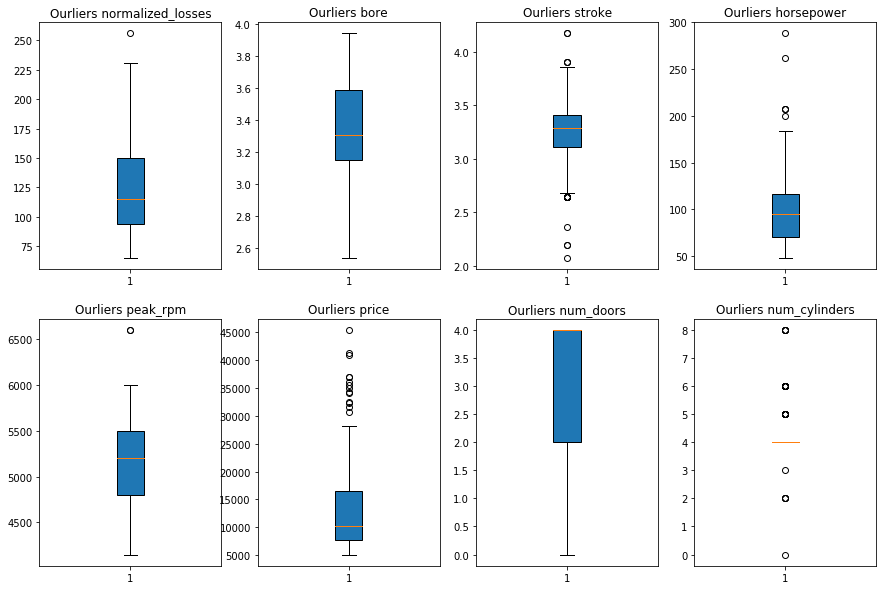

In [81]:
#Para saber si aplico media o mediana a los missing values
#miro los outlaiers por variable diferente a las categoricas.
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
fig, axs = plt.subplots(2, 4,figsize=(15, 10))
axs[0, 0].boxplot(data.normalized_losses.dropna(),patch_artist=True)
axs[0, 0].set_title('Ourliers normalized_losses')
axs[0, 1].boxplot(data.bore.dropna(),patch_artist=True)
axs[0, 1].set_title('Ourliers bore')
axs[0, 2].boxplot(data.stroke.dropna(),patch_artist=True)
axs[0, 2].set_title('Ourliers stroke')
axs[0, 3].boxplot(data.horsepower.dropna(),patch_artist=True)
axs[0, 3].set_title('Ourliers horsepower')
axs[1, 0].boxplot(data.peak_rpm.dropna(),patch_artist=True)
axs[1, 0].set_title('Ourliers peak_rpm')
axs[1, 1].boxplot(data.price.dropna(),patch_artist=True)
axs[1, 1].set_title('Ourliers price')
axs[1, 2].boxplot(data.num_doors.dropna(),patch_artist=True)
axs[1, 2].set_title('Ourliers num_doors')
axs[1, 3].boxplot(data.num_cylinders.dropna(),patch_artist=True)
axs[1, 3].set_title('Ourliers num_cylinders')

plt.show()

In [83]:
#Aplico mediana cuando hay outlier, media cuando no hay outlier
data['num_doors'].replace(0, data.num_doors.mean(), inplace=True)
data['num_cylinders'].replace(0, data.num_cylinders.median(), inplace=True)
data.normalized_losses.fillna(data.normalized_losses.median(), inplace=True)
data.bore.fillna(data.bore.mean(), inplace=True)
data.stroke.fillna(data.stroke.median(), inplace=True)
data.horsepower.fillna(data.horsepower.median(), inplace=True)
data.peak_rpm.fillna(data.peak_rpm.median(), inplace=True)
data.price.fillna(data.price.median(), inplace=True)
data.dropna(inplace=True)
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Se verifica que no haya missing values

In [84]:
data.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

# Exercise 13.2

Split the data into training and testing sets

Train a Random Forest Regressor to predict the price of a car using the nominal features

In [85]:
#Se define función para raiz de menor error cuadratico medio
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [86]:
#Se definen data frames para variables categoricas y no categoricas
X_ = data.drop(['price','symboling','normalized_losses','wheel_base','length','width','height','curb_weight','engine_size','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg'], axis=1)
X = data.drop(['price','make','fuel_type','aspiration','num_doors','body_style','drive_wheels','engine_location','engine_type','num_cylinders','fuel_system'], axis=1)
y = data['price']
X_ = pd.get_dummies(X_)
X = X.join(X_)
X.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,...,engine_type_ohcv,engine_type_rotor,fuel_system_1bbl,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,115.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [87]:
#Modelo usando solo variables nominales
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X_,y, test_size=0.3,random_state=71)
clf = RandomForestRegressor(max_depth=1, n_estimators = 1,max_features=1,random_state=1,n_jobs=-1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
rmse(y_test,y_pred)

5903.268861009583

Se buscan mejores valores para los parametros

In [89]:
ARMSE = []
m = 1000000
for i in range(1,40):
    clf = RandomForestRegressor(max_depth=i, n_estimators = 1,max_features=1,random_state=1,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    ms = rmse(y_test,y_pred)
    ARMSE.append(rmse(y_test,y_pred))  
    if ms < m:
        m=ms
        print(i,' ',m)
        

1   5903.268861009583
2   4949.551106332268
3   4660.498337038936
4   4556.522196714721
9   4314.912358751188
10   4253.384675078763
11   4133.47218241905


Text(0, 0.5, 'RMSE')

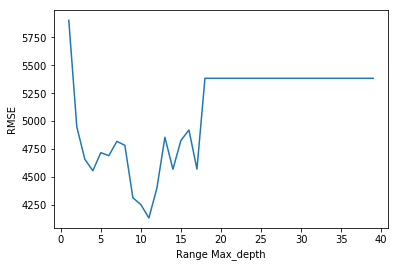

In [90]:
plt.plot(range(1,40), ARMSE)
plt.xlabel('Range Max_depth')
plt.ylabel('RMSE')

In [91]:
ARMSE = []
m = 1000000
for i in range(1,200):
    clf = RandomForestRegressor(max_depth=11, n_estimators = i,max_features=1,random_state=1,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    ms = rmse(y_test,y_pred)
    ARMSE.append(rmse(y_test,y_pred))  
    if ms < m:
        m=ms
        print(i,' ',m)

1   4133.47218241905
2   3133.998284482412
3   2777.3280849053735
42   2741.305265001368
49   2714.3102355760166
50   2708.7439857798527
51   2684.7153615587736
52   2659.5197710952766
59   2645.0727522743796
60   2610.5714847606273
62   2600.608796616887
63   2575.3719948806747


Text(0, 0.5, 'RMSE')

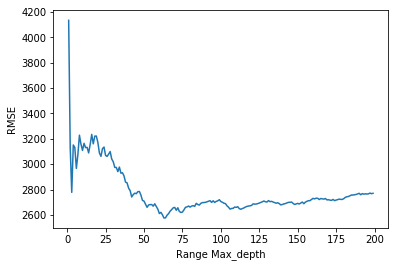

In [92]:
plt.plot(range(1,200), ARMSE)
plt.xlabel('Range Max_depth')
plt.ylabel('RMSE')

In [93]:
ARMSE = []
m = 1000000
for i in range(1,X_.shape[1]):
    clf = RandomForestRegressor(max_depth=11, n_estimators = 63,max_features=i,random_state=1,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    ms = rmse(y_test,y_pred)
    ARMSE.append(rmse(y_test,y_pred))  
    if ms < m:
        m=ms
        print(i,' ',m)

1   2575.371994880675


Text(0, 0.5, 'RMSE')

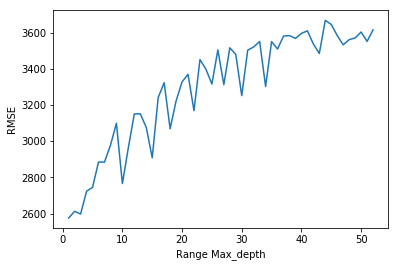

In [94]:
plt.plot(range(1,X_.shape[1]), ARMSE)
plt.xlabel('Range Max_depth')
plt.ylabel('RMSE')

In [96]:
ARMSE = []
m = 1000000
for i in range(1,200):
    clf = RandomForestRegressor(max_depth=11, n_estimators = 63,max_features=1,random_state=i,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    ms = rmse(y_test,y_pred)
    ARMSE.append(rmse(y_test,y_pred))  
    if ms < m:
        m=ms
        print(i,' ',m)

1   2575.3719948806747
15   2524.4093004315782
39   2449.1473441308517


# Exercise 13.3

Create dummy variables for the categorical features

Train a Random Forest Regressor and compare

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=71)
clf = RandomForestRegressor(max_depth=11, n_estimators = 63,max_features=1,random_state=39,n_jobs=-1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
rmse(y_test,y_pred)


1839.6803637193677

Da mayor RMSE que con un modelo de solo variables dummies.

# Exercise 13.4

Apply two other methods of categorical encoding

compare the results

#Con binary

In [98]:
import category_encoders as ce
X_ = ce.BinaryEncoder().fit_transform(data.drop(['price','symboling','normalized_losses','wheel_base','length','width','height','curb_weight','engine_size','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg'], axis=1))
X = data.drop(['price','make','fuel_type','aspiration','num_doors','body_style','drive_wheels','engine_location','engine_type','num_cylinders','fuel_system'], axis=1)
y = data['price']
X = X.join(X_)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=71)
clf = RandomForestRegressor(max_depth=11, n_estimators = 63,max_features=1,random_state=39,n_jobs=-1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
rmse(y_test,y_pred)


1778.0217377397034

#Con Hashing

In [100]:
#Modelo usando variables nominales
#n_components= numero de columnas expandidas, por defecto 8
X_ = ce.HashingEncoder(n_components=8).fit_transform(data.drop(['price','symboling','normalized_losses','wheel_base','length','width','height','curb_weight','engine_size','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg'], axis=1))
X = data.drop(['price','make','fuel_type','aspiration','num_doors','body_style','drive_wheels','engine_location','engine_type','num_cylinders','fuel_system'], axis=1)
y = data['price']
X = X.join(X_)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=71)
clf = RandomForestRegressor(max_depth=11, n_estimators = 63 ,max_features=1,random_state=39,n_jobs=-1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
rmse(y_test,y_pred)


1911.9014224946434

El menor RMSE que dio fue con binary encoding